# Scrape Historical Exchange Rate

## Import html extract of 5 year exchange rate chart

In [10]:
import re
from datetime import datetime, timedelta, date

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

#https://www.xe.com/currencycharts/?from=USD&to=EUR&view=5Y
data_file = 'euro.txt' #values from class="recharts-curve recharts-line-curve"
pic_file = 'euro.png' #screenshot
start_date = '2017-10-08' #start from date on online graph
tick_list = [.799373, .864373, .929373, 1.0476] #key in from screenshot
data = open(data_file, 'r').read()

## Split psuedo date and rate values

In [11]:
split_data = re.split('C|,', data) #split on multiple delimiters

list_vals = []
for i in range(len(split_data)): #build dict of x and y values
    if i < 1796 * 6:
        if i % (2*3) == 0: #until start of last month every two numbers is a row and every third row has the actual data
            list_vals.append(split_data[i + 1])
    else:
        if i % (24*4*3) == 0: #from start of last month data is in 15 min intervals
            list_vals.append(split_data[i + 1])
            
df = pd.DataFrame(list_vals, columns=['value',])

## Clean values

In [12]:
values = -df['value'].astype(float) #flip
scalefactor = (values.max() - values.min()) / (max(tick_list) - min(tick_list))
values /= scalefactor #scale
values += (min(tick_list) - values.min()) #shift
df['value'] = values

## Generate dates

In [13]:
dates = []
for item in range(df.shape[0]): #build list of days
    dates.append(date.fromisoformat(start_date) + timedelta(days=item))
    
df['date'] = dates 

## Compare plot to original chart

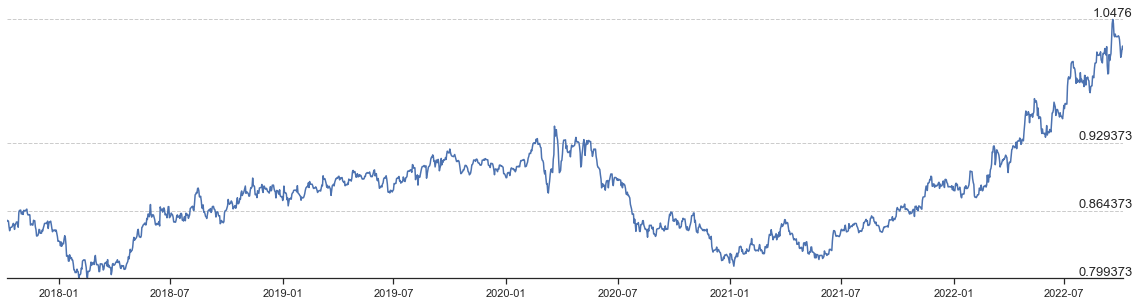

In [14]:
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_style(style='ticks',rc={'ytick.right': False,'ytick.left': False})
ax = sns.lineplot(data=df, x="date", y="value", legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xbound(lower=df['date'].min(), upper=df['date'].max())
ax.set_ylim(df['value'].min())
ax.tick_params(labelleft=False,labelright=True)
ax.yaxis.grid(linestyle='--')
ax.set_yticks(tick_list)
ax.set_yticklabels(tick_list,fontdict={'fontsize': 13,'verticalalignment': 'bottom','horizontalalignment': 'right'})
sns.despine(top=True, right=True, left=True, bottom=False)

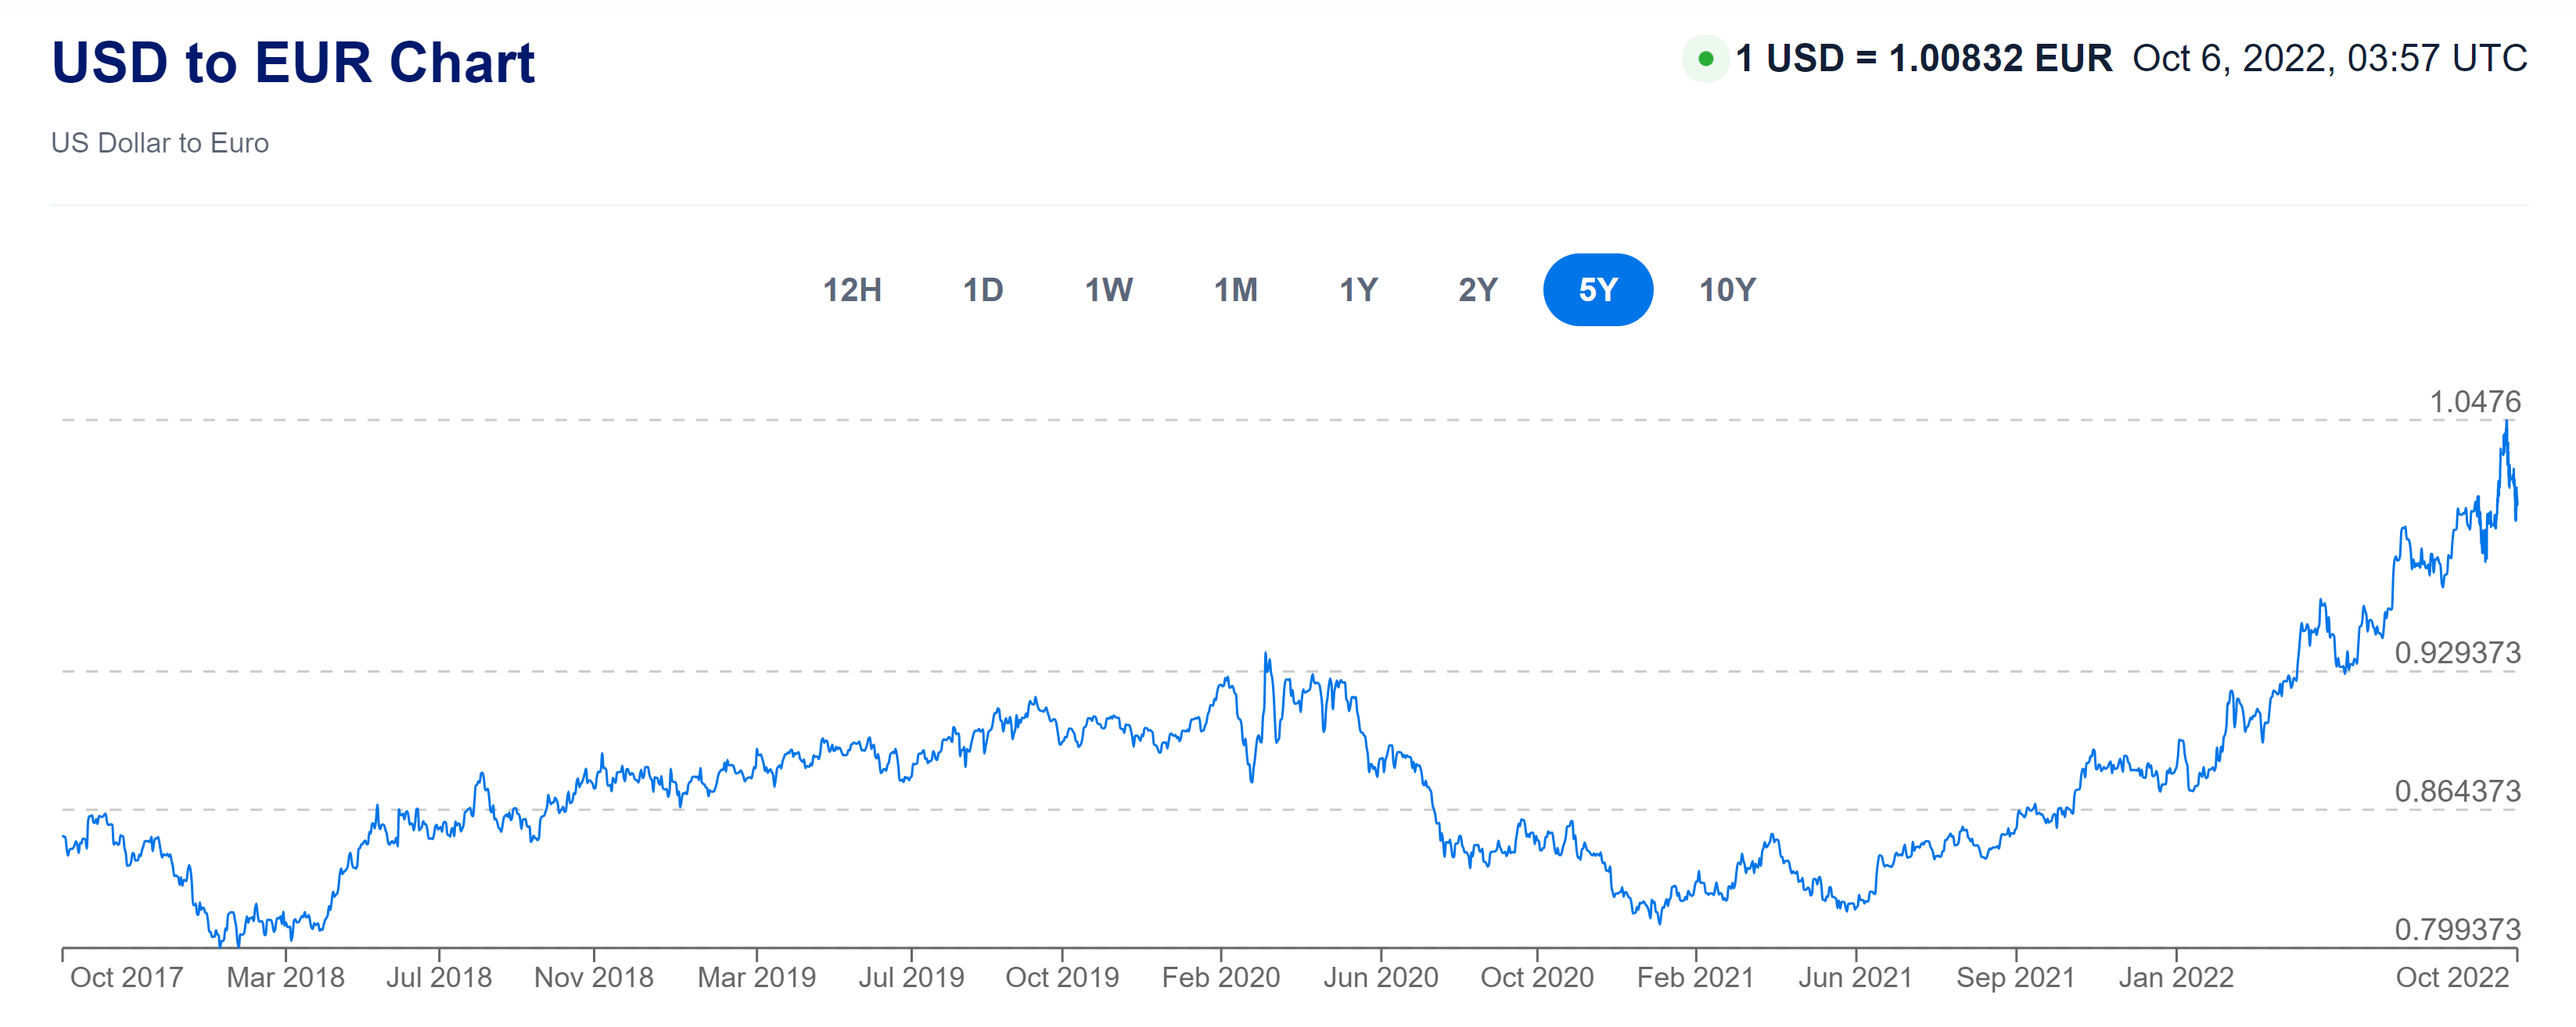

In [15]:
Image(pic_file)

In [16]:
df.to_csv("EUR.csv", index=False)